<a href="https://colab.research.google.com/github/sap156/infinityskillshub/blob/main/Introduction_to_Data_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI for Data Professionals
# Data Parsing and Extraction — Module 3 Part 1
# Introduction to Data Parsing

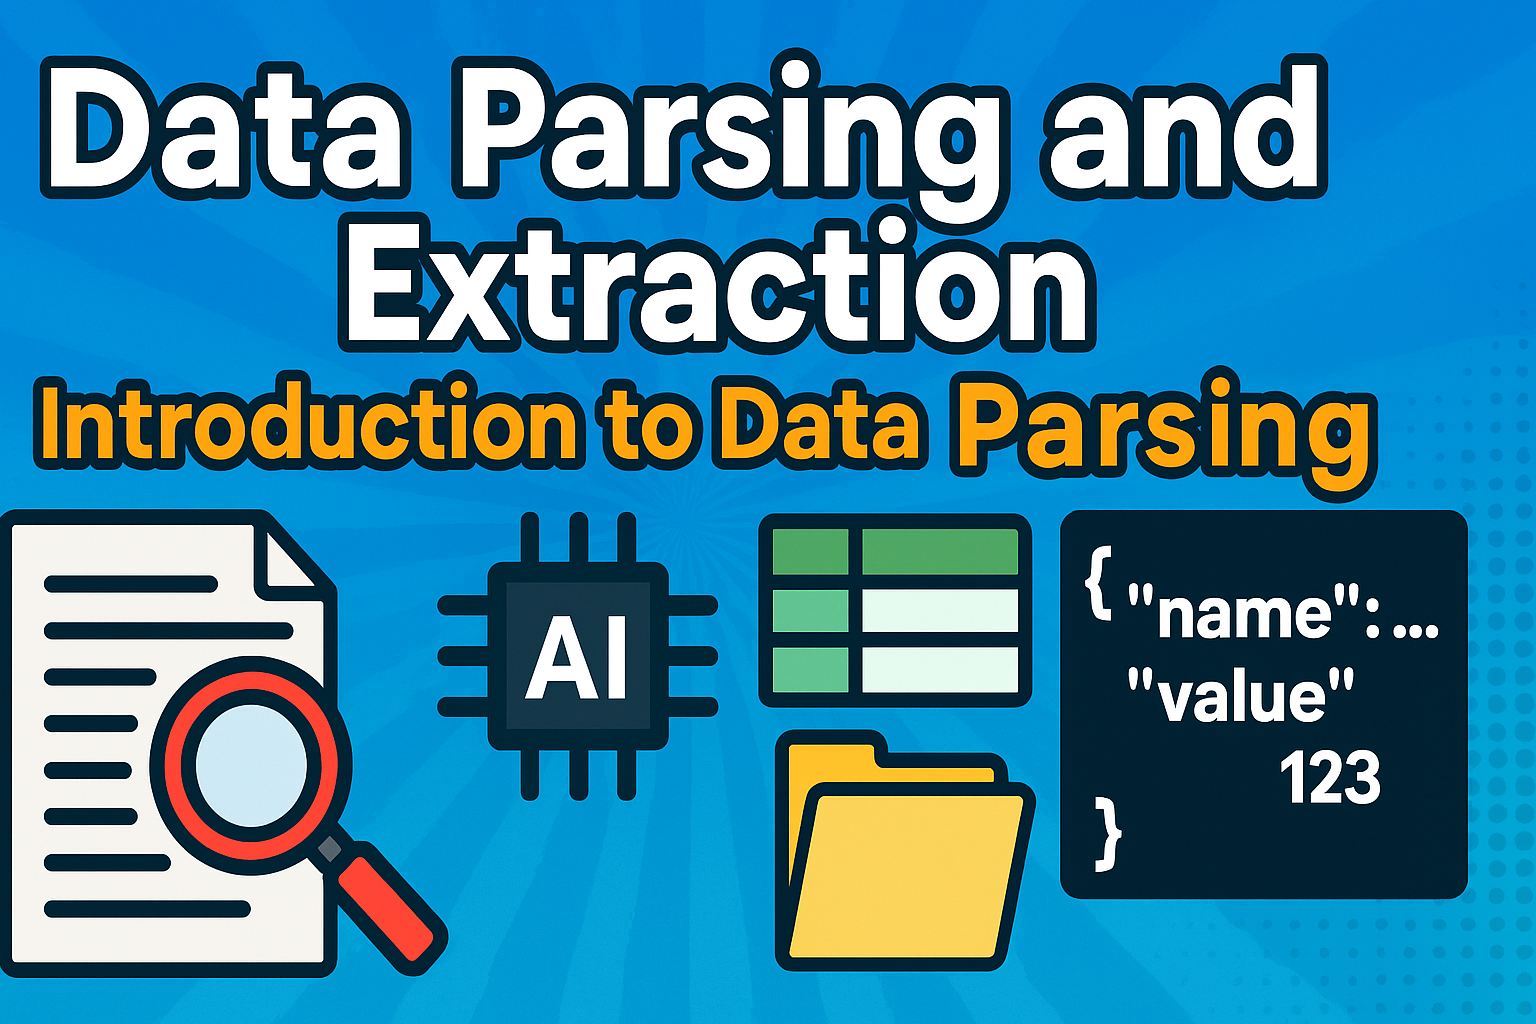

# 📄 Introduction to Data Parsing with Generative AI

One of the **biggest advantages** of **Large Language Models (LLMs)** is their ability to
**convert unstructured text into structured data** that can be analyzed. As a **data engineer**,
you're often working with structured data, transforming, cleaning, and building pipelines.
However, **unstructured data** — such as text documents, web pages, images, and contracts —
often remains **untapped** due to its complexity.

This is where **Generative AI** shines. It allows us to **extract meaningful insights from
raw text, HTML, and even images** — without writing complex parsing logic.

**Learning Objectives:**
- ✅ Parse invoices and extract structured data automatically
- ✅ Handle inconsistent document formats without custom rules
- ✅ Extract key information from complex contracts
- ✅ Convert unstructured text to DataFrame-ready formats
- ✅ Scale document processing for production environments


# =====================================================
# 💡 WHY DATA PARSING WITH AI MATTERS
# =====================================================

## Applications of Data Parsing and Extraction

**1. Extracting Features from Unstructured Text**
Many real-world datasets come in free-text formats. Instead of manually structuring them,
**LLMs can extract key information automatically**.

**Example Use Cases:**
- **Social Media Sentiment Analysis:** Extract sentiment, topics, hashtags
- **Customer Reviews Analysis:** Identify issues, sentiment, mentions
- **Financial Document Processing:** Parse invoices, receipts, contracts

**2. Extracting Data from Web Pages and Images**
Scraping data from the web or extracting information from **scanned documents**
can be tedious. **LLMs make this process seamless**.

**Example Use Cases:**
- **Web Scraping:** Extract product names, prices, ratings without HTML parsing
- **Receipt Processing:** Handle inconsistent formats across different vendors
- **Document Digitization:** Convert scanned documents to structured data

**3. Named Entity Recognition (NER) and Anonymization**
Removing **personally identifiable information (PII)** while preserving data value.

**Example Use Cases:**
- **PII Removal:** Automatically detect and redact sensitive information
- **Compliance:** Ensure GDPR, HIPAA, CCPA compliance
- **Data Sharing:** Safely share datasets across teams and organizations

🎯 **Key Advantage:** No need for complex regex, custom parsing rules, or format-specific code!

In [ ]:
# =====================================================
# 🛠️ SETUP AND IMPORTS
# =====================================================

from openai import OpenAI
import pandas as pd
import json
import numpy as np
from pprint import pprint
from google.colab import userdata


api_key=userdata.get('OPENAI_API_KEY')

# Set up our AI client securely
client = OpenAI(api_key=api_key)

def clean(dict_variable):
    return next(iter(dict_variable.values()))

print("✅ Environment ready for time series generation!")


# =====================================================
# 📄 PARSING INVOICES WITH AI
# =====================================================


## Example: Parsing an Invoice

Let's consider an example where we have an invoice in text format. This invoice may
come from an OCR process or a database containing raw text.

Traditional parsing would require:
- Complex regex patterns
- Format-specific rules
- Error handling for variations

With AI, we simply describe what we want extracted!





In [7]:
# Sample invoice text
invoice_text = """
Date: 6/10/25
Name : Abhinav Parvathaneni
Invoice #: INV-2025-001
Items:
1. Website Design - $1000
2. Logo Creation - $500.00
3. SEO Services - $750
Total: $2250
"""

print("📄 Original Invoice Text:")
print(invoice_text)

📄 Original Invoice Text:

Date: 6/10/25
Name : Abhinav Parvathaneni
Invoice #: INV-2025-001
Items:
1. Website Design - $1000
2. Logo Creation - $500.00
3. SEO Services - $750
Total: $2250



In [8]:
# Make API call
response =  client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{
        "role": "user",
        "content": f"Parse the following invoice and output in JSON form: {invoice_text}"
    }],
    response_format={"type": "json_object"}
)

# Extract and parse the JSON response
parsed_invoice = json.loads(response.choices[0].message.content)
print("\n📊 Parsed Invoice Data:")
print(json.dumps(parsed_invoice, indent=2))


📊 Parsed Invoice Data:
{
  "invoice": {
    "date": "6/10/25",
    "name": "Abhinav Parvathaneni",
    "invoice_number": "INV-2025-001",
    "items": [
      {
        "description": "Website Design",
        "amount": 1000.0
      },
      {
        "description": "Logo Creation",
        "amount": 500.0
      },
      {
        "description": "SEO Services",
        "amount": 750.0
      }
    ],
    "total": 2250.0
  }
}


🎯 **Amazing Results!** The AI automatically:
- Identified all invoice fields
- Structured the line items properly
- Converted dollar amounts to numbers
- Organized everything in a logical JSON structure

No regex, no custom parsing rules - just intelligent extraction!

# =====================================================
# 🔄 HANDLING FORMAT INCONSISTENCIES
# =====================================================


## The Power of Generative AI in Parsing Data

What makes Generative AI exceptional for parsing data is its ability to handle
inconsistencies. If we change the invoice format — altering the placement of values,
formatting styles, or even the way the total is written — LLMs can still parse it
correctly without additional coding.

In [9]:
# Modified invoice with different formatting
invoice_text_v2 = """
6/10/25
Abhinav Parvathaneni
Invoice #: INV-2025-001
Items:
Website Design - $1000
Logo Creation - $500.00
SEO Services - $750
Total: $2250
"""

print("📄 Modified Invoice Format:")
print(invoice_text_v2)

📄 Modified Invoice Format:

6/10/25
Abhinav Parvathaneni
Invoice #: INV-2025-001
Items:
Website Design - $1000
Logo Creation - $500.00
SEO Services - $750
Total: $2250



In [10]:
# Parse the modified format
response_v2 = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{
        "role": "user",
        "content": f"Parse the following invoice and output in JSON form: {invoice_text_v2}. The columns should be Invoice Number, Invoice Date, Total, and Number of Products."
    }],
    response_format={"type": "json_object"}
)

parsed_invoice_v2 = json.loads(response_v2.choices[0].message.content)
print("\n📊 Parsed Modified Format:")
print(parsed_invoice_v2)



📊 Parsed Modified Format:
{'Invoice Number': 'INV-2025-001', 'Invoice Date': '6/10/25', 'Total': 2250, 'Number of Products': 3}


🎯 **Format Flexibility Demonstrated:**

This means:
- **No need for complex regex parsing**
- **No need to hardcode extraction rules**
- **No dependency on fixed formatting**
- **Automatic adaptation to new document layouts**

Traditional parsing systems would break with format changes. AI adapts automatically!


# =====================================================
# 📋 PARSING COMPLEX CONTRACTS
# =====================================================


## Parsing Complex Contracts

Parsing invoices is useful, but let's apply the same principle to a more complex
document — an employment contract. Traditional parsing methods struggle when
documents have varying structures, but LLMs can intelligently extract key details.

**Example: Extracting Data from Contracts**
We can extract structured data such as company name, contract date, and compensation
from different contract formats.

In [12]:
contract_text = """
SERVICE AGREEMENT #1

This Service Agreement (the "Agreement") is entered into on January 1, 2025 (the "Effective Date") by and between:

ABC Corp., a corporation organized under the laws of Delaware, with its principal place of business at 123 Main St, Anytown, USA ("Service Provider")

and

XYZ Inc., a corporation organized under the laws of Texas, with its principal place of business at 456 Oak Ave, Otherville, USA ("Client")

1. SERVICES
   Service Provider agrees to provide the following services to Client:
   a) Software development
   b) System maintenance
   c) Technical support

2. TERM
   This Agreement shall commence on the Effective Date and continue for a period of 24 months.

3. COMPENSATION
   Client agrees to pay Service Provider a monthly fee of $10,000 for the services provided.

4. TERMINATION
   Either party may terminate this Agreement with 30 days written notice.


SERVICE AGREEMENT #2

This Service Agreement (the "Agreement") is entered into on December 1, 2024 (the "Effective Date") by and between:

Henry Cookies., a corporation organized under the laws of Delaware, with its principal place of business at 123 Main St, Anytown, USA ("Service Provider")

and

XYZ Inc., a corporation organized under the laws of Texas, with its principal place of business at 456 Oak Ave, Otherville, USA ("Client")

1. SERVICES
   Service Provider agrees to provide the following services to Client:
   a) Software development
   b) System maintenance
   c) Technical support

2. TERM
   This Agreement shall commence on the Effective Date and continue for a period of 8 months.

3. COMPENSATION
   Client agrees to pay Service Provider a monthly fee of $50,000 for the services provided.

4. TERMINATION
   Either party may terminate this Agreement with 30 days written notice.


"""

print("📋 Complex Contract Text (2 Agreements):")
print(contract_text[:500] + "...[truncated]")


📋 Complex Contract Text (2 Agreements):

SERVICE AGREEMENT #1

This Service Agreement (the "Agreement") is entered into on January 1, 2025 (the "Effective Date") by and between:

ABC Corp., a corporation organized under the laws of Delaware, with its principal place of business at 123 Main St, Anytown, USA ("Service Provider")

and

XYZ Inc., a corporation organized under the laws of Texas, with its principal place of business at 456 Oak Ave, Otherville, USA ("Client")

1. SERVICES
   Service Provider agrees to provide the following s...[truncated]


In [13]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{
        "role": "user",
        "content": f"Extract key information from the following contract and output it in JSON form. Extract Company Name, Date, Compensation, and Term: {contract_text}"
    }],
    response_format={"type": "json_object"}
)

# Extract JSON response
parsed_contract = json.loads(response.choices[0].message.content)
print("\n📊 Comprehensive Contract Parsing:")
print(json.dumps(parsed_contract, indent=2))


📊 Comprehensive Contract Parsing:
{
  "contracts": [
    {
      "Company_Name": "ABC Corp.",
      "Date": "January 1, 2025",
      "Compensation": "$10,000",
      "Term": "24 months"
    },
    {
      "Company_Name": "Henry Cookies.",
      "Date": "December 1, 2024",
      "Compensation": "$50,000",
      "Term": "8 months"
    }
  ]
}


🎯 **Complex Document Intelligence:** The AI successfully:
- Identified TWO separate contracts in one document
- Extracted detailed information for each contract
- Organized parties, services, terms, and compensation
- Maintained legal document structure and relationships

This would require hundreds of lines of custom parsing code traditionally!

**💡 Best Practices for Document Parsing:**

1. **Be Specific in Prompts:** Clearly specify the fields and format you need
2. **Request DataFrame Format:** Ask for JSON that converts easily to pandas
3. **Handle Multiple Documents:** Design prompts that can parse multiple items
4. **Validate Results:** Always check extracted data for accuracy
5. **Build Reusable Functions:** Create generic parsing functions for production

**🚀 Immediate Applications:**

- **Financial Processing:** Automate invoice, receipt, and statement parsing
- **Legal Document Analysis:** Extract key terms from contracts and agreements
- **Compliance Monitoring:** Process regulatory documents for key requirements
- **Business Intelligence:** Convert unstructured reports to structured insights
